### Cats_and_Dogs example on a GTX 1080 Ti with batch_size = 64
Time_per_epoch with Data Augmentation: 6 sec

Total run time: approx 960 sec (16.5 mins)

In [1]:
import tensorflow as tf
import keras
print("TensorFlow version: %s" % tf.__version__)
print("Keras version: %s" % keras.__version__)

Using TensorFlow backend.


TensorFlow version: 1.1.0
Keras version: 2.0.5


## 5.2.2 Downloading the data

### Listing 5.9 Copying images to train, validation and test directories

In [2]:
import os, shutil
# The path to the directory where the original # dataset was uncompressed
original_dataset_dir = '/home/eric/Link to nbs/DLWP/cats_and_dogs/original_dataset'
# The directory where we will # store our smaller dataset
base_dir = '/home/eric/Link to nbs/DLWP/cats_and_dogs/cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
# Directories for our training, # validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [5]:
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [6]:
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [7]:
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [9]:
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'/train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Listing 5.10 Counting our images

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [17]:
print('total training dog images:', len(os.listdir(train_dogs_dir))) 

total training dog images: 1000


In [18]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [19]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [20]:
print('total test cat images:', len(os.listdir(test_cats_dir))) 

total test cat images: 500


In [21]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## 5.2.3 Building our network

### Listing 5.11 Instantiating a small convnet for cats vs. dogs classification

In [22]:
from keras import layers
from keras import models

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Listing 5.12 Displaying a summary of the model

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Listing 5.13 Configuring our model for training

In [25]:
from keras import optimizers

In [26]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

## 5.2.4 Data preprocessing

### Listing 5.14 Using ImageDataGenerator to read images from directories

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255) # all images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
                    train_dir, # this is the target directory
                    target_size=(150, 150), # all images will be resized to 150x150
                    batch_size=64,
                    class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=64,
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


### Listing 5.15 Displaying the shapes of a batch of data and labels

In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch:', data_batch.shape)
    print('labels batch:', labels_batch.shape)
    break

data batch: (64, 150, 150, 3)
labels batch: (64,)


### Listing 5.16 Fitting our model using a batch generator

In [32]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=31,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=16)

Epoch 1/30
31/31 [==============================] - 8s - loss: 0.6967 - acc: 0.5322 - val_loss: 0.6903 - val_acc: 0.5000
Epoch 2/30
31/31 [==============================] - 6s - loss: 0.6804 - acc: 0.5711 - val_loss: 0.6798 - val_acc: 0.5380
Epoch 3/30
31/31 [==============================] - 6s - loss: 0.6641 - acc: 0.6064 - val_loss: 0.6656 - val_acc: 0.5780
Epoch 4/30
31/31 [==============================] - 6s - loss: 0.6452 - acc: 0.6432 - val_loss: 0.6438 - val_acc: 0.6420
Epoch 5/30
31/31 [==============================] - 6s - loss: 0.6243 - acc: 0.6667 - val_loss: 0.6337 - val_acc: 0.6380
Epoch 6/30
31/31 [==============================] - 5s - loss: 0.6006 - acc: 0.6841 - val_loss: 0.6316 - val_acc: 0.6350
Epoch 7/30
31/31 [==============================] - 6s - loss: 0.5902 - acc: 0.6960 - val_loss: 0.6289 - val_acc: 0.6340
Epoch 8/30
31/31 [==============================] - 6s - loss: 0.5650 - acc: 0.7292 - val_loss: 0.6129 - val_acc: 0.6650
Epoch 9/30
31/31 [==============

### Listing 5.17 Saving our model

In [33]:
model.save('cats_and_dogs_small_1.h5')

### Listing 5.18 Displaying curves of loss and accuracy during training

In [34]:
import matplotlib.pyplot as plt

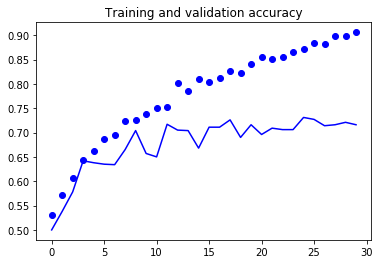

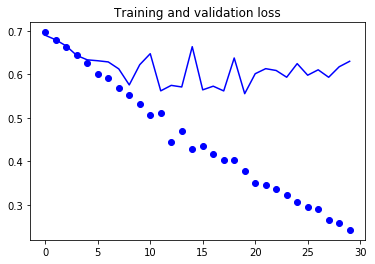

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

## 5.2.5 Using data augmentation

### Listing 5.19 Setting up a data augmentation configuration via ImageDataGenerator

In [36]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

### Listing 5.20 Displaying some randomly augmented training images

In [37]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

In [38]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # We pick one image to "augment"
img = image.load_img(img_path, target_size=(150, 150)) # Read the image and resize it
x = image.img_to_array(img) # Convert it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Reshape it to (1, 150, 150, 3)

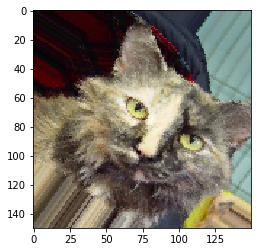

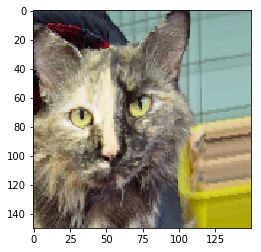

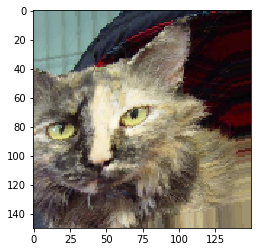

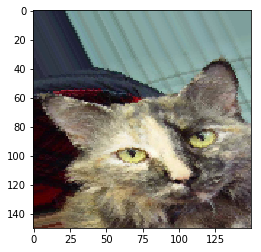

In [39]:
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

### Listing 5.21 Defining a new convnet that includes dropout

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

### Listing 5.22 Training our convnet using data augmentation generators

In [42]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

In [43]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
                    train_dir, # This is the target directory
                    target_size=(150, 150), # All images will be resized to 150x150
                    batch_size=32,
                    class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

Found 2000 images belonging to 2 classes.


In [45]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=64,
                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [46]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=32,
            epochs=100,
            validation_data=validation_generator,
            validation_steps= 16)

Epoch 1/100
32/32 [==============================] - 7s - loss: 0.6962 - acc: 0.4961 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 2/100
32/32 [==============================] - 6s - loss: 0.6960 - acc: 0.4951 - val_loss: 0.6916 - val_acc: 0.5050
Epoch 3/100
32/32 [==============================] - 6s - loss: 0.6937 - acc: 0.5127 - val_loss: 0.6878 - val_acc: 0.5600
Epoch 4/100
32/32 [==============================] - 6s - loss: 0.6862 - acc: 0.5528 - val_loss: 0.6763 - val_acc: 0.5840
Epoch 5/100
32/32 [==============================] - 6s - loss: 0.6802 - acc: 0.5615 - val_loss: 0.6705 - val_acc: 0.5820
Epoch 6/100
32/32 [==============================] - 6s - loss: 0.6773 - acc: 0.5664 - val_loss: 0.6600 - val_acc: 0.6050
Epoch 7/100
32/32 [==============================] - 6s - loss: 0.6655 - acc: 0.5967 - val_loss: 0.6569 - val_acc: 0.5980
Epoch 8/100
32/32 [==============================] - 6s - loss: 0.6740 - acc: 0.5723 - val_loss: 0.6539 - val_acc: 0.6150
Epoch 9/100
32/32 [=====

32/32 [==============================] - 6s - loss: 0.5116 - acc: 0.7646 - val_loss: 0.5093 - val_acc: 0.7400
Epoch 68/100
32/32 [==============================] - 7s - loss: 0.5269 - acc: 0.7246 - val_loss: 0.5156 - val_acc: 0.7450
Epoch 69/100
32/32 [==============================] - 6s - loss: 0.5108 - acc: 0.7558 - val_loss: 0.4926 - val_acc: 0.7620
Epoch 70/100
32/32 [==============================] - 7s - loss: 0.5226 - acc: 0.7422 - val_loss: 0.5116 - val_acc: 0.7370
Epoch 71/100
32/32 [==============================] - 6s - loss: 0.5187 - acc: 0.7529 - val_loss: 0.5273 - val_acc: 0.7230
Epoch 72/100
32/32 [==============================] - 6s - loss: 0.5092 - acc: 0.7588 - val_loss: 0.5321 - val_acc: 0.7290
Epoch 73/100
32/32 [==============================] - 6s - loss: 0.5189 - acc: 0.7588 - val_loss: 0.5062 - val_acc: 0.7420
Epoch 74/100
32/32 [==============================] - 6s - loss: 0.5144 - acc: 0.7334 - val_loss: 0.4942 - val_acc: 0.7460
Epoch 75/100
32/32 [=========

### Listing 5.23 Saving our model

In [47]:
model.save('cats_and_dogs_small_2.h5')

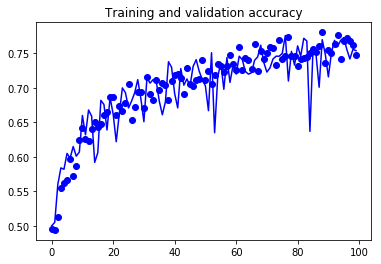

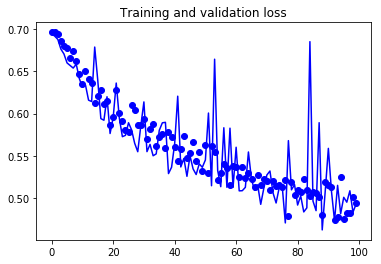

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()